In [174]:
import pyaudio
import wave
import librosa
import numpy as np

# پارامترهای ضبط صوت
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 3

# نام فایل های صوتی
filename_yes = "yes.wav"
filename_no = "no.wav"

# تنظیم ورودی صدا
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

# ضبط کلمه "بله"
print("Record the word 'Yes'...")
frames_yes = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames_yes.append(data)

# ذخیره فایل صوتی برای "بله"
wf = wave.open(filename_yes, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames_yes))
wf.close()

# ضبط کلمه "خیر"
print("Record the word 'No'...")
frames_no = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames_no.append(data)

# ذخیره فایل صوتی برای "خیر"
wf = wave.open(filename_no, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames_no))
wf.close()

# بستن ورودی صدا
stream.stop_stream()
stream.close()
p.terminate()

# استخراج ویژگیهای مشخصات
def extract_features(filename):
    audio, sr = librosa.load(filename, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr)
    return mfccs

# استخراج ویژگیهای مشخصات برای "بله"
features_yes = extract_features(filename_yes)
# ذخیره ویژگیهای مشخصات برای "بله"
np.save("features_yes.npy", features_yes)

# استخراج ویژگیهای مشخصات برای "خیر"
features_no = extract_features(filename_no)
# ذخیره ویژگیهای مشخصات برای "خیر"
np.save("features_no.npy", features_no)

print("saved!")

Record the word 'Yes'...
Record the word 'No'...
saved!


In [177]:
# نام فایل صوتی و مشخصات
filename_input = "input.wav"
filename_features = "features_input.npy"

# تنظیم ورودی صدا
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=CHUNK)

# ضبط کلمه ورودی
print("Record input word...")
frames_input = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames_input.append(data)

# ذخیره فایل صوتی برای کلمه ورودی
wf = wave.open(filename_input, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames_input))
wf.close()

# بستن ورودی صدا
stream.stop_stream()
stream.close()
p.terminate()

# استخراج ویژگیهای مشخصات
def extract_features(filename):
    audio, sr = librosa.load(filename, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr)
    return mfccs

# استخراج ویژگیهای مشخصات برای کلمه ورودی
features_input = extract_features(filename_input)
# ذخیره ویژگیهای مشخصات برای کلمه ورودی
np.save(filename_features, features_input)

print("saved!")

Record input word...
saved!


تعداد فریم ها: 1318
طول هر فریم (نمونه): 300
پیشرفت هر فریم (نمونه): 100


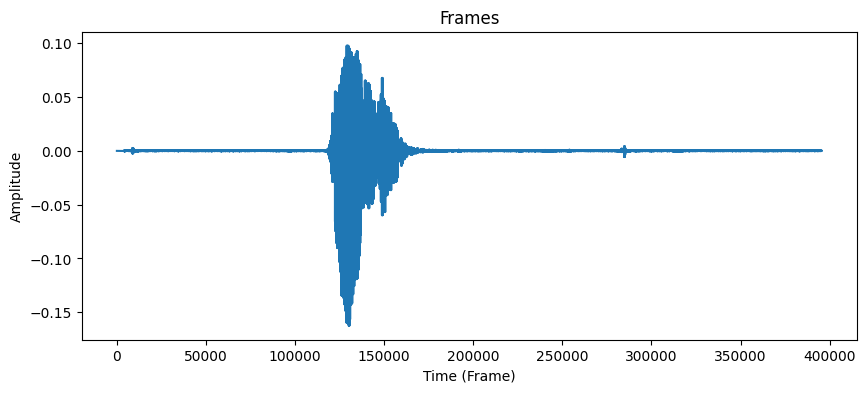

In [178]:
# مسیر فایل ورودی
input_file = "input.wav"

# طول فریم (به صورت نمونه)
frame_length = 300
# پیشرفت فریم (به صورت نمونه)
frame_hop = 100

# خواندن فایل گفتار ورودی
audio, sr = librosa.load(input_file, sr=None)

# تقسیم فایل گفتار به فریم ها
frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=frame_hop).T

# تعداد فریم ها
num_frames = frames.shape[0]

# نمایش اطلاعات
print("تعداد فریم ها:", num_frames)
print("طول هر فریم (نمونه):", frame_length)
print("پیشرفت هر فریم (نمونه):", frame_hop)


# رسم فریم ها
plt.figure(figsize=(10, 4))
plt.title("Frames")
plt.xlabel("Time (Frame)")
plt.ylabel("Amplitude")
plt.plot(frames.flatten())
plt.show()

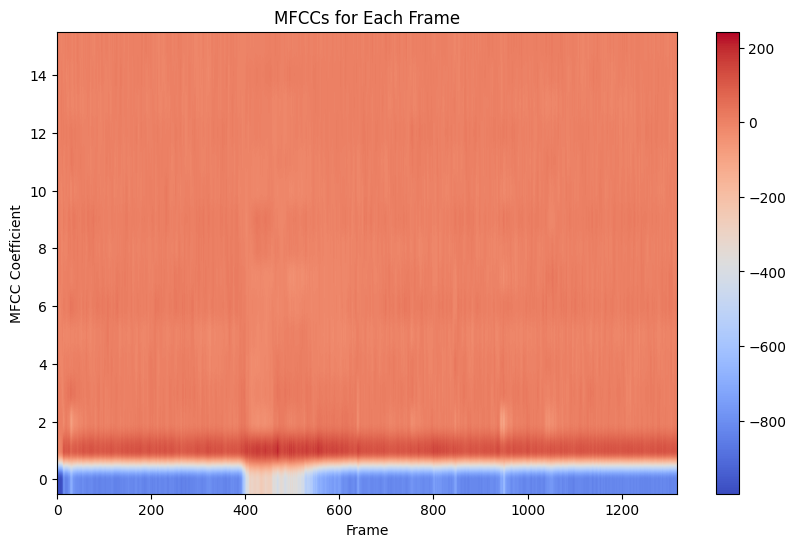

In [179]:
# تعداد ضرایب کپسترال
num_mfcc = 16

# خواندن فایل گفتار ورودی
audio, sr = librosa.load(input_file, sr=None)

# تقسیم فایل گفتار به فریم ها
frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=frame_hop).T

# تعداد فریم ها
num_frames = frames.shape[0]

# محاسبه بردار مشخصات هر فریم
mfccs = np.zeros((num_frames, num_mfcc))
for i in range(num_frames):
    frame = frames[i]
    mfcc = librosa.feature.mfcc(y=frame, sr=sr, n_mfcc=num_mfcc)
    mfccs[i] = mfcc.flatten()

# رسم مشخصات برای هر فریم
plt.figure(figsize=(10, 6))
plt.imshow(mfccs.T, aspect='auto', origin='lower', cmap='coolwarm')
plt.colorbar()
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient')
plt.title('MFCCs for Each Frame')
plt.show()


In [180]:
from fastdtw import fastdtw

# بارگیری دنباله بردارهای مشخصات کلمه ورودی
features_input = np.load("features_input.npy")

# بارگیری دنباله بردارهای مشخصات الگوی بله
features_yes = np.load("features_yes.npy")

# بارگیری دنباله بردارهای مشخصات الگوی خیر
features_no = np.load("features_no.npy")

# بین دنباله ورودی و الگوی بله DTW محاسبه فاصله
distance_yes, path_yes = fastdtw(features_input, features_yes)

# بین دنباله ورودی و الگوی خیر DTW محاسبه فاصله 
distance_no, path_no = fastdtw(features_input, features_no)

# نمایش فاصله محاسبه شده
print("فاصله DTW بین دنباله ورودی و الگوی بله:", distance_yes)
print("فاصله DTW بین دنباله ورودی و الگوی خیر:", distance_no)


فاصله DTW بین دنباله ورودی و الگوی بله: 52635.786453615874
فاصله DTW بین دنباله ورودی و الگوی خیر: 80882.43710296601


فاصله برای الگوی بله: 49414.95467109946
فاصله برای الگوی خیر: 71670.33253329714


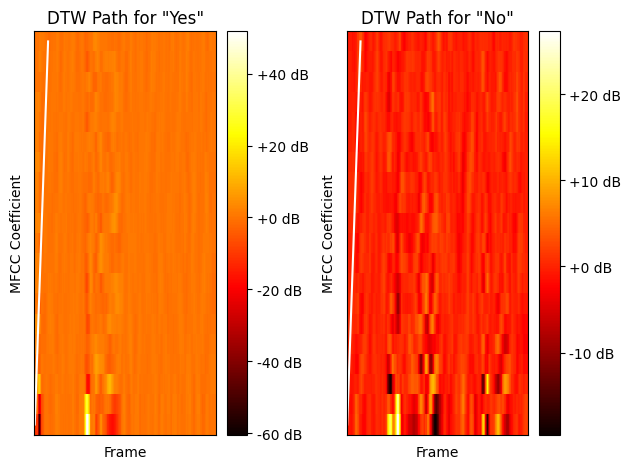

In [181]:
from scipy.spatial.distance import euclidean
import librosa.display

# تابع محاسبه فاصله برای شرایط پیوستگی
def local_itakura_dist(x, y):
    return euclidean(x, y) ** 2

# محاسبه فاصله کپسترال بین دنباله ورودی و الگوی بله با شرایط پیوستگی
distance_yes, path_yes = fastdtw(librosa.feature.delta(features_input), librosa.feature.delta(features_yes), dist=local_itakura_dist)

# محاسبه فاصله کپسترال بین دنباله ورودی و الگوی خیر با شرایط پیوستگی
distance_no, path_no = fastdtw(librosa.feature.delta(features_input), librosa.feature.delta(features_no), dist=local_itakura_dist)

# نمایش فاصله
print("فاصله برای الگوی بله:", distance_yes)
print("فاصله برای الگوی خیر:", distance_no)

plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.feature.delta(features_yes), cmap='hot')
plt.plot([p[1] for p in path_yes], [p[0] for p in path_yes], color='w')
plt.title('DTW Path for "Yes"')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient')
plt.colorbar(format='%+2.0f dB')

plt.subplot(1, 2, 2)
librosa.display.specshow(librosa.feature.delta(features_no), cmap='hot')
plt.plot([p[1] for p in path_no], [p[0] for p in path_no], color='w')
plt.title('DTW Path for "No"')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()


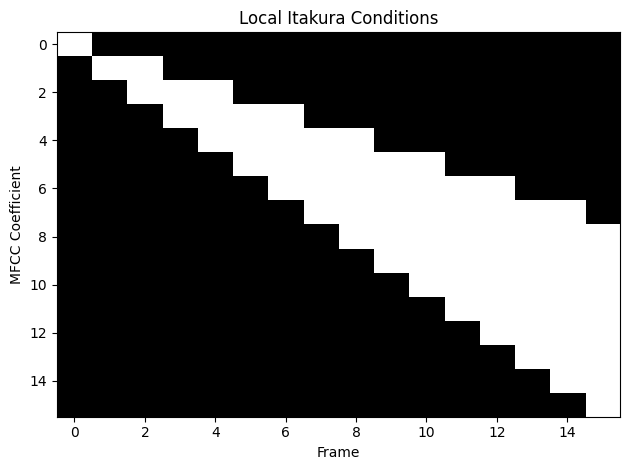

In [182]:
# محاسبه بردارهای شرایط محلی ایتاکورا
ones_itakura = np.zeros((num_mfcc, num_mfcc))
for i in range(num_mfcc):
    for j in range(num_mfcc):
        if j >= i and j <= 2 * i:
            ones_itakura[i, j] = 1

# رسم بردارهای شرایط محلی ایتاکورا
plt.imshow(ones_itakura, aspect='auto', cmap='gray')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient')
plt.title('Local Itakura Conditions')
plt.tight_layout()
plt.show()

In [183]:
# تشخیص کلمه ورودی بر اساس فاصله
if distance_yes < distance_no:
    print("کلمه ورودی به الگوی (بله) نزدیکتر است.")
else:
    print("کلمه ورودی به الگوی (خیر) نزدیکتر است.")


کلمه ورودی به الگوی (بله) نزدیکتر است.
